In [170]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import getpass
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import linregress, t
pd.set_option('display.max_columns', None)

desired_username = 'felixlavallee-morissette'
current_username = getpass.getuser()

if current_username == desired_username:
    directory_path = '/Users/felixlavallee-morissette/Downloads/'
    os.chdir(directory_path)
    print(f"Directory changed to {directory_path}")
else:
    print("This is not Felix's computer. Directory change not executed.")

Directory changed to /Users/felixlavallee-morissette/Downloads/


In [95]:
# data cleaning
sheets_dict = pd.read_excel("Data_for_project(1).xlsx", sheet_name=None)
# df_usd = pd.read_excel("Data_with_usd.xlsx", sheet_name='USD')

# Access each DataFrame using the sheet name as key
df_aus = sheets_dict['AUD']
df_cad = sheets_dict['CAD']
df_chf = sheets_dict['CHF']
df_usd = sheets_dict['USD']


def clean_df(df):
    df.columns = df.iloc[2]
    df = df.drop(df.index[:3])
    df = df.drop(df.index[:2])
    df = df.rename(columns={df.columns[0]: 'Timestamp'}) 
    return df

def calculate_7day_rolling_average(df):
    # Temporarily set the 'Timestamp' as the index
    df_temp = df.copy()
    df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'])
    df_temp.set_index('Timestamp', inplace=True)

    # Calculate the 7-day rolling average
    rolling_df = df_temp.rolling(window=7, min_periods=1).mean()

    # Reset the index back to the original
    rolling_df.reset_index(inplace=True)

    return rolling_df



In [96]:
sheets_dict = pd.read_excel("Data_for_project(1).xlsx", sheet_name=None)

# Access each DataFrame using the sheet name as key
df_usd= sheets_dict['USD']
df_usd.columns = df_usd.iloc[2]
df_usd = df_usd.drop(df_usd.index[:3])
df_usd = df_usd.drop(df_usd.index[:2])
df_usd = df_usd.rename(columns={df_usd.columns[0]: 'Timestamp'})

df_aus= sheets_dict['AUD']
df_aus.columns = df_aus.iloc[2]
df_aus = df_aus.drop(df_aus.index[:3])
df_aus = df_aus.drop(df_aus.index[:2])
df_aus = df_aus.rename(columns={df_aus.columns[0]: 'Timestamp'})

df_cad = sheets_dict['CAD']
df_cad.columns = df_cad.iloc[2]
df_cad = df_cad.drop(df_cad.index[:3])
df_cad = df_cad.drop(df_cad.index[:2])
df_cad = df_cad.rename(columns={df_cad.columns[0]: 'Timestamp'})

df_chf = sheets_dict['CHF']
df_chf.columns = df_chf.iloc[2]
df_chf = df_chf.drop(df_chf.index[:3])
df_chf = df_chf.drop(df_chf.index[:2])
df_chf = df_chf.rename(columns={df_chf.columns[0]: 'Timestamp'})

df_jpy = sheets_dict['JPY']
df_jpy.columns = df_jpy.iloc[2]
df_jpy = df_jpy.drop(df_jpy.index[:3])
df_jpy = df_jpy.drop(df_jpy.index[:2])
df_jpy = df_jpy.rename(columns={df_jpy.columns[0]: 'Timestamp'})

df_eur = sheets_dict['EUR']
df_eur.columns = df_eur.iloc[2]
df_eur = df_eur.drop(df_eur.index[:3])
df_eur = df_eur.drop(df_eur.index[:2])
df_eur = df_eur.rename(columns={df_eur.columns[0]: 'Timestamp'})

df_gbp = sheets_dict['GBP']
df_gbp.columns = df_gbp.iloc[2]
df_gbp = df_gbp.drop(df_gbp.index[:3])
df_gbp = df_gbp.drop(df_gbp.index[:2])
df_gbp = df_gbp.rename(columns={df_gbp.columns[0]: 'Timestamp'})

# usd_10 = clean_df(df_usd_10)
df_aus = calculate_7day_rolling_average(df_aus)
df_cad = calculate_7day_rolling_average(df_cad)
df_chf = calculate_7day_rolling_average(df_chf)
df_usd = calculate_7day_rolling_average(df_usd)
df_jpy = calculate_7day_rolling_average(df_jpy)
df_eur = calculate_7day_rolling_average(df_eur)
df_gbp = calculate_7day_rolling_average(df_gbp)
# usd_10 = calculate_7day_rolling_average(usd_10)
# df_usd['USSW10 Curncy'] = usd_10['USSW10 Curncy']
df_chf = df_chf.loc[:,~df_chf.columns.duplicated()].copy()

In [97]:
df_gbp

2,Timestamp,GBP Curncy,GBP3M Curncy,BP0003M Index,BPBS1 Curncy,BPBS2 Curncy,BPBS3 Curncy,BPBS5 Curncy,BPBS7 Curncy,BPBS10 Curncy,BPSW1 Curncy,BPSW2 Curncy,BPSW3 Curncy,BPSW5 Curncy,BPSW7 Curncy,BPSW10 Curncy,BPSW1V3 Curncy,BPSW2V3 Curncy,BPSW3V3 Curncy,BPSW5V3 Curncy,BPSW7V3 Curncy,BPSW10V3 Curncy,C1103M Index,C1101Y Index,C1102Y Index,C1103Y Index,C1105Y Index,C1107Y Index,C11010Y Index
0,NaT,1.636200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,1.636100,-0.470000,6.138130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.760000,6.410000,6.5400,6.560000,6.230000,6.0900,5.7000
2,2000-01-05,1.638267,-0.830000,6.140630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.775000,6.420000,6.5500,6.575000,6.260000,6.1300,5.7450
3,2000-01-06,1.640550,-1.030000,6.143440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.776667,6.423333,6.5500,6.583333,6.276667,6.1600,5.7500
4,2000-01-07,1.640300,-1.017500,6.142113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.772500,6.420000,6.5350,6.575000,6.272500,6.1625,5.7375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,2024-03-27,1.266714,6.161429,5.307129,-3.5,-3.875,-2.875,-2.375,-0.875,0.625,0.8835,1.199,1.3027,1.29275,1.2368,1.20825,0.826,1.117,1.1801,1.155,1.0951,1.0616,5.041200,4.747900,4.2052,3.944700,3.774200,3.7950,3.9737
6323,2024-03-28,1.265314,6.137143,5.304514,-3.5,-3.875,-2.875,-2.375,-0.875,0.625,0.8835,1.199,1.3027,1.29275,1.2368,1.20825,0.826,1.117,1.1801,1.155,1.0951,1.0616,5.041200,4.747900,4.2052,3.944700,3.774200,3.7950,3.9737
6324,2024-03-29,1.263000,6.158571,5.302300,-3.5,-3.875,-2.875,-2.375,-0.875,0.625,0.8835,1.199,1.3027,1.29275,1.2368,1.20825,0.826,1.117,1.1801,1.155,1.0951,1.0616,5.041200,4.747900,4.2052,3.944700,3.774200,3.7950,3.9737
6325,2024-04-01,1.261486,6.161429,5.300643,-3.5,-3.875,-2.875,-2.375,-0.875,0.625,0.8835,1.199,1.3027,1.29275,1.2368,1.20825,0.826,1.117,1.1801,1.155,1.0951,1.0616,5.041200,4.747900,4.2052,3.944700,3.774200,3.7950,3.9737


In [98]:
df_aus_1y = df_aus.loc[:, ['Timestamp', df_aus.columns[-6]]]
df_cad_1y = df_cad.loc[:, ['Timestamp', df_cad.columns[-6]]]
df_chf_1y = df_chf.loc[:, ['Timestamp', df_chf.columns[-6]]]
df_usd_1y = df_usd.loc[:, ['Timestamp', df_usd.columns[-6]]]

df_eur_1y = df_eur.loc[:, ['Timestamp', df_eur.columns[-6]]]
df_gbp_1y = df_gbp.loc[:, ['Timestamp', df_gbp.columns[-6]]]
df_jpy_1y = df_jpy.loc[:, ['Timestamp', df_jpy.columns[-6]]]

In [99]:
df_aus_5y = df_aus.loc[:, ['Timestamp', df_aus.columns[-3]]]
df_cad_5y = df_cad.loc[:, ['Timestamp', df_cad.columns[-3]]]
df_chf_5y = df_chf.loc[:, ['Timestamp', df_chf.columns[-3]]]
df_usd_5y = df_usd.loc[:, ['Timestamp', df_usd.columns[-3]]]

df_eur_5y = df_eur.loc[:, ['Timestamp', df_eur.columns[-3]]]
df_gbp_5y = df_gbp.loc[:, ['Timestamp', df_gbp.columns[-3]]]
df_jpy_5y = df_jpy.loc[:, ['Timestamp', df_jpy.columns[-3]]]

In [100]:
df_aus_10y = df_aus.loc[:, ['Timestamp', df_aus.columns[-1]]]
df_cad_10y = df_cad.loc[:, ['Timestamp', df_cad.columns[-1]]]
df_chf_10y = df_chf.loc[:, ['Timestamp', df_chf.columns[-1]]]
df_usd_10y = df_usd.loc[:, ['Timestamp', df_usd.columns[-1]]]

df_eur_10y = df_eur.loc[:, ['Timestamp', df_eur.columns[-1]]]
df_gbp_10y = df_gbp.loc[:, ['Timestamp', df_gbp.columns[-1]]]
df_jpy_10y = df_jpy.loc[:, ['Timestamp', df_jpy.columns[-1]]]

____

In [101]:
df_aus_1y['aud_irs'] = df_aus['ADSWAP1 Curncy']
df_aus_1y['aud_bs'] = df_aus['ADBS1 Curncy'] / 100
df_aus_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_aus_1y['aud_rho'] = df_aus_1y['aud_irs'] + df_aus_1y['aud_bs'] - df_aus_1y['usd_irs']

df_aus_5y['aud_irs'] = df_aus['ADSWAP5 Curncy']
df_aus_5y['aud_bs'] = df_aus['ADBS5 Curncy'] / 100
df_aus_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_aus_5y['aud_rho'] = df_aus_5y['aud_irs'] + df_aus_5y['aud_bs'] - df_aus_5y['usd_irs']

df_aus_10y['aud_irs'] = df_aus['ADSWAP10 Curncy']
df_aus_10y['aud_bs'] = df_aus['ADBS10 Curncy'] / 100
df_aus_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_aus_10y['aud_rho'] = df_aus_10y['aud_irs'] + df_aus_10y['aud_bs'] - df_aus_10y['usd_irs']

In [102]:
df_cad_1y['cad_irs'] = df_cad['CDSW1 Curncy']
df_cad_1y['cad_bs'] = df_cad['CDBS1 Curncy'] / 100
df_cad_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_cad_1y['cad_rho'] = df_cad_1y['cad_irs'] + df_cad_1y['cad_bs'] - df_cad_1y['usd_irs']

df_cad_5y['cad_irs'] = df_cad['CDSW5 Curncy']
df_cad_5y['cad_bs'] = df_cad['CDBS5 Curncy'] / 100
df_cad_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_cad_5y['cad_rho'] = df_cad_5y['cad_irs'] + df_cad_5y['cad_bs'] - df_cad_5y['usd_irs']

df_cad_10y['cad_irs'] = df_cad['CDSW10 Curncy']
df_cad_10y['cad_bs'] = df_cad['CDBS10 Curncy'] / 100
df_cad_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_cad_10y['cad_rho'] = df_cad_10y['cad_irs'] + df_cad_10y['cad_bs'] - df_cad_10y['usd_irs']

In [103]:
df_chf_1y['chf_irs'] = df_chf['SFSW1 Curncy']
df_chf_1y['chf_bs'] = df_chf['SFBS1 Curncy'] / 100
df_chf_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_chf_1y['chf_rho'] = df_chf_1y['chf_irs'] + df_chf_1y['chf_bs'] - df_chf_1y['usd_irs']

df_chf_5y['chf_irs'] = df_chf['SFSW5 Curncy']
df_chf_5y['chf_bs'] = df_chf['SFBS5 Curncy'] / 100
df_chf_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_chf_5y['chf_rho'] = df_chf_5y['chf_irs'] + df_chf_5y['chf_bs'] - df_chf_5y['usd_irs']

df_chf_10y['chf_irs'] = df_chf['SFSW10 Curncy']
df_chf_10y['chf_bs'] = df_chf['SFBS10 Curncy'] / 100
df_chf_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_chf_10y['chf_rho'] = df_chf_10y['chf_irs'] + df_chf_10y['chf_bs'] - df_chf_10y['usd_irs']

In [104]:
df_jpy_1y['jpy_irs'] = df_jpy['JYSW1 Curncy']
df_jpy_1y['jpy_bs'] = df_jpy['JYBS1 Curncy'] / 100
df_jpy_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_jpy_1y['jpy_rho'] = df_jpy_1y['jpy_irs'] + df_jpy_1y['jpy_bs'] - df_jpy_1y['usd_irs']

df_jpy_5y['jpy_irs'] = df_jpy['JYSW5 Curncy']
df_jpy_5y['jpy_bs'] = df_jpy['JYBS5 Curncy'] / 100
df_jpy_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_jpy_5y['jpy_rho'] = df_jpy_5y['jpy_irs'] + df_jpy_5y['jpy_bs'] - df_jpy_5y['usd_irs']

df_jpy_10y['jpy_irs'] = df_jpy['JYSW10 Curncy']
df_jpy_10y['jpy_bs'] = df_jpy['JYBS10 Curncy'] / 100
df_jpy_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_jpy_10y['jpy_rho'] = df_jpy_10y['jpy_irs'] + df_jpy_10y['jpy_bs'] - df_jpy_10y['usd_irs']

In [105]:
df_eur_1y['eur_irs'] = df_eur['EUSW1V3 Curncy']
df_eur_1y['eur_bs'] = df_eur['EUBS1 Curncy'] / 100
df_eur_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_eur_1y['eur_rho'] = df_eur_1y['eur_irs'] + df_eur_1y['eur_bs'] - df_eur_1y['usd_irs']

df_eur_5y['eur_irs'] = df_eur['EUSW5V3 Curncy']
df_eur_5y['eur_bs'] = df_eur['EUBS5 Curncy'] / 100
df_eur_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_eur_5y['eur_rho'] = df_eur_5y['eur_irs'] + df_eur_5y['eur_bs'] - df_eur_5y['usd_irs']

df_eur_10y['eur_irs'] = df_eur['EUSW10V3 Curncy']
df_eur_10y['eur_bs'] = df_eur['EUBS10 Curncy'] / 100
df_eur_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_eur_10y['eur_rho'] = df_eur_10y['eur_irs'] + df_eur_10y['eur_bs'] - df_eur_10y['usd_irs']

In [106]:
df_gbp_1y['gbp_irs'] = df_gbp['BPSW1 Curncy']
df_gbp_1y['gbp_bs'] = df_gbp['BPBS1 Curncy'] / 100
df_gbp_1y['usd_irs'] = df_usd['USSW1 Curncy']
df_gbp_1y['gbp_rho'] = df_gbp_1y['gbp_irs'] + df_gbp_1y['gbp_bs'] - df_gbp_1y['usd_irs']

df_gbp_5y['gbp_irs'] = df_gbp['BPSW5 Curncy']
df_gbp_5y['gbp_bs'] = df_gbp['BPBS5 Curncy'] / 100
df_gbp_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_gbp_5y['gbp_rho'] = df_gbp_5y['gbp_irs'] + df_gbp_5y['gbp_bs'] - df_gbp_5y['usd_irs']

df_gbp_10y['gbp_irs'] = df_gbp['BPSW10 Curncy']
df_gbp_10y['gbp_bs'] = df_gbp['BPBS10 Curncy'] / 100
df_gbp_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_gbp_10y['gbp_rho'] = df_gbp_10y['gbp_irs'] + df_gbp_10y['gbp_bs'] - df_gbp_10y['usd_irs']

___

In [107]:
df_aus_1y['us_treasury_premium_aus'] = df_aus_1y['C1271Y Index'] - df_aus_1y['aud_rho'] - df_usd_1y['C0821Y Index']
df_cad_1y['us_treasury_premium_cad'] = df_cad_1y['C1011Y Index'] - df_cad_1y['cad_rho'] - df_usd_1y['C0821Y Index']
df_chf_1y['us_treasury_premium_chf'] = df_chf_1y['C2561Y Index'] - df_chf_1y['chf_rho'] - df_usd_1y['C0821Y Index']

df_jpy_1y['us_treasury_premium_jpy'] = df_jpy_1y['C1051Y Index'] - df_jpy_1y['jpy_rho'] - df_usd_1y['C0821Y Index']
df_eur_1y['us_treasury_premium_eur'] = df_eur_1y['C9101Y Index'] - df_eur_1y['eur_rho'] - df_usd_1y['C0821Y Index']
df_gbp_1y['us_treasury_premium_gbp'] = df_gbp_1y['C1101Y Index'] - df_gbp_1y['gbp_rho'] - df_usd_1y['C0821Y Index']

In [108]:
df_aus_5y['us_treasury_premium_aus'] = df_aus_5y['C1275Y Index'] - df_aus_5y['aud_rho'] - df_usd_5y['C0825Y Index']
df_cad_5y['us_treasury_premium_cad'] = df_cad_5y['C1015Y Index'] - df_cad_5y['cad_rho'] - df_usd_5y['C0825Y Index']
df_chf_5y['us_treasury_premium_chf'] = df_chf_5y['C2565Y Index'] - df_chf_5y['chf_rho'] - df_usd_5y['C0825Y Index']

df_jpy_5y['us_treasury_premium_jpy'] = df_jpy_5y['C1055Y Index'] - df_jpy_5y['jpy_rho'] - df_usd_5y['C0825Y Index']
df_eur_5y['us_treasury_premium_eur'] = df_eur_5y['C9105Y Index'] - df_eur_5y['eur_rho'] - df_usd_5y['C0825Y Index']
df_gbp_5y['us_treasury_premium_gbp'] = df_gbp_5y['C1105Y Index'] - df_gbp_5y['gbp_rho'] - df_usd_5y['C0825Y Index']

In [109]:
df_aus_10y['us_treasury_premium_aus'] = df_aus_10y['C12710Y Index'] - df_aus_10y['aud_rho'] - df_usd_10y['C08210Y Index']
df_cad_10y['us_treasury_premium_cad'] = df_cad_10y['C10110Y Index'] - df_cad_10y['cad_rho'] - df_usd_10y['C08210Y Index']
df_chf_10y['us_treasury_premium_chf'] = df_chf_10y['C25610Y Index'] - df_chf_10y['chf_rho'] - df_usd_10y['C08210Y Index']

df_jpy_10y['us_treasury_premium_jpy'] = df_jpy_10y['C10510Y Index'] - df_jpy_10y['jpy_rho'] - df_usd_10y['C08210Y Index']
df_eur_10y['us_treasury_premium_eur'] = df_eur_10y['C91010Y Index'] - df_eur_10y['eur_rho'] - df_usd_10y['C08210Y Index']
df_gbp_10y['us_treasury_premium_gbp'] = df_gbp_10y['C11010Y Index'] - df_gbp_10y['gbp_rho'] - df_usd_10y['C08210Y Index']

In [110]:
df_usd_1y['ustp_mean'] = 100*(df_aus_1y['us_treasury_premium_aus']+df_cad_1y['us_treasury_premium_cad']+df_chf_1y['us_treasury_premium_chf']\
                              +df_eur_1y['us_treasury_premium_eur']+df_jpy_1y['us_treasury_premium_jpy']+df_gbp_1y['us_treasury_premium_gbp'])/6

In [111]:
df_usd_5y['ustp_mean'] = 100*(df_aus_5y['us_treasury_premium_aus']+df_cad_5y['us_treasury_premium_cad']+df_chf_5y['us_treasury_premium_chf']\
                              +df_eur_5y['us_treasury_premium_eur']+df_jpy_5y['us_treasury_premium_jpy']+df_gbp_5y['us_treasury_premium_gbp'])/6

In [112]:
df_usd_10y['ustp_mean'] = 100*(df_aus_10y['us_treasury_premium_aus']+df_cad_10y['us_treasury_premium_cad']+df_chf_10y['us_treasury_premium_chf']\
                              +df_eur_10y['us_treasury_premium_eur']+df_jpy_10y['us_treasury_premium_jpy']+df_gbp_10y['us_treasury_premium_gbp'])/6

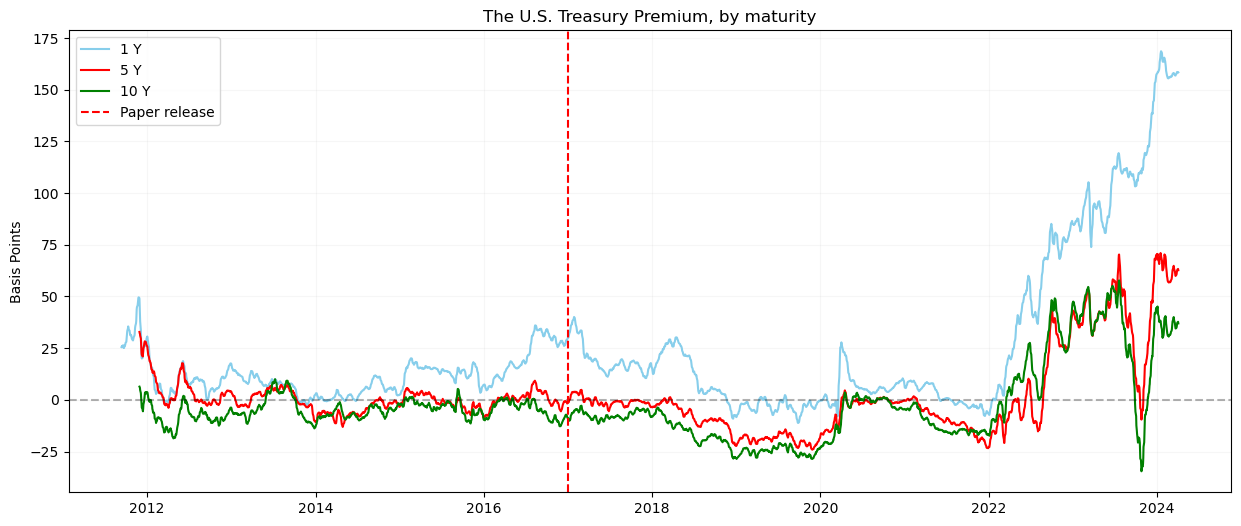

In [128]:
plt.figure(figsize=(15, 6))
plt.plot(df_usd_1y['Timestamp'], df_usd_1y['ustp_mean'], label='1 Y', color = 'skyblue')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['ustp_mean'], label='5 Y', color = 'red')
plt.plot(df_usd_10y['Timestamp'], df_usd_10y['ustp_mean'], label='10 Y', color = 'green')
plt.axhline(0, color='black', linestyle='dashed', alpha=0.3)
plt.axvline(x=pd.Timestamp('2017-01-01'), color='r', linestyle='--', label='Paper release')

plt.ylabel('Basis Points')
plt.title("The U.S. Treasury Premium, by maturity")
plt.legend()
plt.grid(True, alpha = 0.1)

In [152]:
# Sample data
data_dxy = pd.read_excel("DXY.xlsx", sheet_name=None) # Independent variable
df_dxy= data_dxy['DXY']
df_dxy.columns = df_dxy.iloc[2]
df_dxy = df_dxy.drop(df_dxy.index[:3])
df_dxy = df_dxy.drop(df_dxy.index[:2])
df_dxy = df_dxy.rename(columns={df_dxy.columns[0]: 'Timestamp'})

# Convert 'Timestamp' column to datetime in df_dxy
df_dxy['Timestamp'] = pd.to_datetime(df_dxy['Timestamp'])

# Perform inner join on 'Timestamp' column
merged_df = pd.merge(df_dxy, df_usd_1y, on='Timestamp', how='inner')
# Assuming 'merged_df' is your DataFrame
merged_df.drop(columns=['C0821Y Index'], inplace=True)
merged_df.dropna(inplace=True)
# Display the merged DataFrame
print(merged_df)

2     Timestamp DXY Curncy   ustp_mean
3031 2011-09-12     77.578   25.544643
3032 2011-09-13     76.919   25.746071
3033 2011-09-14     76.833   25.921310
3034 2011-09-15     76.241   25.566524
3035 2011-09-16     76.599   26.056190
...         ...        ...         ...
6297 2024-03-27    104.348  158.431500
6298 2024-03-28    104.546  158.571619
6299 2024-03-29    104.487  158.527452
6300 2024-04-01    105.019  158.530786
6301 2024-04-02    104.816  158.376381

[3271 rows x 3 columns]


Coefficient 0: 0.22743877872968918, p-value: 0.0
Coefficient 1: -39.62307439861969, p-value: 0.0
Coefficient 2: 1724.3544548563063, p-value: 0.0
R^2: 0.48567119979558393


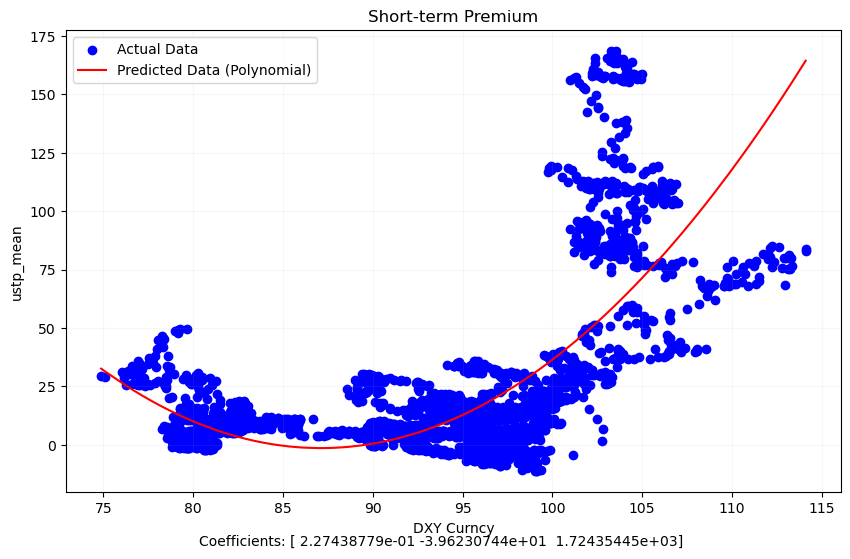

In [185]:
from scipy.stats import linregress, t
import numpy as np

# Assuming 'DXY Curncy' and 'ustp_mean' are the columns in your merged_df DataFrame
X = merged_df['DXY Curncy'].astype(float).values  # Convert to float
y = merged_df['ustp_mean'].astype(float).values  # Convert to float

# Fit a polynomial function
degree = 2  # Degree of the polynomial
coefficients = np.polyfit(X, y, degree)

# Generate the polynomial function
polynomial = np.poly1d(coefficients)

# Predicted values
predicted_y_poly = polynomial(X)

# Residuals
residuals = y - predicted_y_poly

# Degrees of freedom
n = len(X)
dof = n - degree - 1

# Residual sum of squares
rss = np.sum(residuals ** 2)

# Mean squared error
mse = rss / dof

# Design matrix
X_design = np.column_stack([X ** i for i in range(degree, -1, -1)])

# Covariance matrix of the coefficients
cov_matrix = np.linalg.inv(np.dot(X_design.T, X_design))

# Standard errors of the coefficients
std_err = np.sqrt(np.diag(cov_matrix) * mse)

# t-values
t_values = coefficients / std_err

# p-values for the coefficients
p_values = 2 * (1 - t.cdf(np.abs(t_values), dof))

# Print the results
for i, coeff in enumerate(coefficients):
    print(f"Coefficient {i}: {coeff}, p-value: {p_values[i]}")
# Calculate R^2
r_squared = 1 - (rss / np.sum((y - np.mean(y))**2))
# Print R^2
print("R^2:", r_squared)



# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')  # Scatter plot of actual data

# Sort X values for better visualization
sorted_indices = np.argsort(X)
sorted_X = X[sorted_indices]
sorted_predicted_y_poly = predicted_y_poly[sorted_indices]

plt.plot(sorted_X, sorted_predicted_y_poly, color='red', label='Predicted Data (Polynomial)')  # Line plot of predicted data
plt.xlabel('DXY Curncy')
plt.ylabel('ustp_mean')
plt.title('Short-term Premium')
plt.legend()
plt.grid(True, alpha=0.1)

# Adding coefficient text at the bottom
coeff_text = f'Coefficients: {coefficients}'
plt.text(0.5, 0.02, coeff_text, ha='center', fontsize=10, transform=plt.gcf().transFigure)

plt.show()




_____

In [ ]:
# Cross-country Mean 10 year US treasury premium: df_usd_10y['ustp_mean']

In [ ]:
df_aus_5y['swap_spread'] = 100*(df_aus_5y['aud_irs'] - df_aus_5y['C1275Y Index'])
df_cad_5y['swap_spread'] = 100*(df_cad_5y['cad_irs'] - df_cad_5y['C1015Y Index'])
df_chf_5y['swap_spread'] = 100*(df_chf_5y['chf_irs'] - df_chf_5y['C2565Y Index'])
df_usd_5y['swap_spread'] = 100*(df_usd_5y['C0825Y Index'] - df_aus_5y['usd_irs'])
df_usd_5y['non_usd_ss'] = (df_aus_5y['swap_spread']+df_cad_5y['swap_spread']+df_chf_5y['swap_spread'])/3
# If it's not a numeric type, convert it to float
df_aus_5y['swap_spread'] = pd.to_numeric(df_aus_5y['swap_spread'], errors='coerce')
df_cad_5y['swap_spread'] = pd.to_numeric(df_cad_5y['swap_spread'], errors='coerce')
df_chf_5y['swap_spread'] = pd.to_numeric(df_chf_5y['swap_spread'], errors='coerce')
df_usd_5y['swap_spread'] = pd.to_numeric(df_usd_5y['swap_spread'], errors='coerce')
df_usd_5y['non_usd_ss'] = pd.to_numeric(df_usd_5y['non_usd_ss'], errors='coerce')

In [ ]:
df_aus_5y['Timestamp'] = pd.to_datetime(df_aus_5y['Timestamp'])
df_cad_5y['Timestamp'] = pd.to_datetime(df_cad_5y['Timestamp'])
df_chf_5y['Timestamp'] = pd.to_datetime(df_chf_5y['Timestamp'])
df_usd_5y['Timestamp'] = pd.to_datetime(df_usd_5y['Timestamp'])
df_aus_5y.set_index('Timestamp', inplace=True)
df_cad_5y.set_index('Timestamp', inplace=True)
df_chf_5y.set_index('Timestamp', inplace=True)
df_usd_5y.set_index('Timestamp', inplace=True)
df_aus_5y = df_aus_5y[pd.notnull(df_aus_5y.index)]
df_cad_5y = df_cad_5y[pd.notnull(df_cad_5y.index)]
df_chf_5y = df_chf_5y[pd.notnull(df_chf_5y.index)]
df_usd_5y = df_usd_5y[pd.notnull(df_usd_5y.index)]

In [ ]:
df_aus_5y

2,C1275Y Index,aud_irs,aud_bs,usd_irs,aud_rho,us_treasury_premium_aus,swap_spread
Timestamp,,,,,,,
2000-01-04,6.9000,7.350000,NaN,NaN,NaN,NaN,45.000000
2000-01-05,6.8700,7.305000,NaN,NaN,NaN,NaN,43.500000
2000-01-06,6.8900,7.316667,NaN,NaN,NaN,NaN,42.666667
2000-01-07,6.9025,7.326250,NaN,NaN,NaN,NaN,42.375000
2000-01-10,6.9140,7.338000,NaN,NaN,NaN,NaN,42.400000
...,...,...,...,...,...,...,...
2024-03-27,3.6183,4.037187,0.3386,4.219,0.156787,-0.554387,41.888714
2024-03-28,3.6183,4.025609,0.3386,4.219,0.145209,-0.542809,40.730857
2024-03-29,3.6183,4.019009,0.3386,4.219,0.138609,-0.536209,40.070857


In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.sandwich_covariance import cov_hac
# Define the time periods
full_sample = ('2012', '2024-04-02')  # Adjust these dates as needed
period1 = ('2012', '2016')
period2 = ('2017', '2019')
period3 = ('2020', '2024-04-02')

# Function to calculate mean and standard deviation for a given period
# def calculate_stats(df, start_year, end_year):
#     period_df = df[start_year:end_year]
#     mean = period_df['swap_spread'].mean()
#     nw_se = sm.stats.newey_west(period_df['swap_spread'], lags=91)
#     return mean, nw_se
def calculate_stats(df, start_date, end_date):
    
    period_df = df.loc[start_date:end_date, 'swap_spread']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
# Apply the function to each DataFrame and time period
aus_full_mean, aus_full_ste = calculate_stats(df_aus_5y, *full_sample)
aus_period1_mean, aus_period1_ste = calculate_stats(df_aus_5y, *period1)
aus_period2_mean, aus_period2_ste = calculate_stats(df_aus_5y, *period2)
aus_period3_mean, aus_period3_ste = calculate_stats(df_aus_5y, *period3)

NameError: name 'np' is not defined

In [ ]:
cad_full_mean, cad_full_ste = calculate_stats(df_cad_5y, *full_sample)
cad_period1_mean, cad_period1_ste = calculate_stats(df_cad_5y, *period1)
cad_period2_mean, cad_period2_ste = calculate_stats(df_cad_5y, *period2)
cad_period3_mean, cad_period3_ste = calculate_stats(df_cad_5y, *period3)

In [ ]:
chf_full_mean, chf_full_ste = calculate_stats(df_chf_5y, *full_sample)
chf_period1_mean, chf_period1_ste = calculate_stats(df_chf_5y, *period1)
chf_period2_mean, chf_period2_ste = calculate_stats(df_chf_5y, *period2)
chf_period3_mean, chf_period3_ste = calculate_stats(df_chf_5y, *period3)

In [ ]:
usd_full_mean, usd_full_ste = calculate_stats(df_usd_5y, *full_sample)
usd_period1_mean, usd_period1_ste = calculate_stats(df_usd_5y, *period1)
usd_period2_mean, usd_period2_ste = calculate_stats(df_usd_5y, *period2)
usd_period3_mean, usd_period3_ste = calculate_stats(df_usd_5y, *period3)

In [ ]:
def calculate_stats_nonusd(df, start_date, end_date):
    period_df = df.loc[start_date:end_date, 'non_usd_ss']
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]  # Only one regressor here, which is the constant term
nonusd_full_mean, nonusd_full_ste = calculate_stats_nonusd(df_usd_5y, *full_sample)
nonusd_period1_mean, nonusd_period1_ste = calculate_stats_nonusd(df_usd_5y, *period1)
nonusd_period2_mean, nonusd_period2_ste = calculate_stats_nonusd(df_usd_5y, *period2)
nonusd_period3_mean, nonusd_period3_ste = calculate_stats_nonusd(df_usd_5y, *period3)

In [ ]:
results = {
    'AUD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'CAD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'CHF': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'NON_USD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'USD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
}
results['AUD']['full_sample'] = {'Mean': aus_full_mean, 'Std Error': aus_full_ste}
results['AUD']['2012_2016'] = {'Mean': aus_period1_mean, 'Std Error': aus_period1_ste}
results['AUD']['2017_2019'] = {'Mean': aus_period2_mean, 'Std Error': aus_period2_ste}
results['AUD']['2020_2024'] = {'Mean': aus_period3_mean, 'Std Error': aus_period3_ste}

results['CAD']['full_sample'] = {'Mean': cad_full_mean, 'Std Error': cad_full_ste}
results['CAD']['2012_2016'] = {'Mean': cad_period1_mean, 'Std Error': cad_period1_ste}
results['CAD']['2017_2019'] = {'Mean': cad_period2_mean, 'Std Error': cad_period2_ste}
results['CAD']['2020_2024'] = {'Mean': cad_period3_mean, 'Std Error': cad_period3_ste}

results['CHF']['full_sample'] = {'Mean': chf_full_mean, 'Std Error': chf_full_ste}
results['CHF']['2012_2016'] = {'Mean': chf_period1_mean, 'Std Error': chf_period1_ste}
results['CHF']['2017_2019'] = {'Mean': chf_period2_mean, 'Std Error': chf_period2_ste}
results['CHF']['2020_2024'] = {'Mean': chf_period3_mean, 'Std Error': chf_period3_ste}

results['NON_USD']['full_sample'] = {'Mean': nonusd_full_mean, 'Std Error': nonusd_full_ste}
results['NON_USD']['2012_2016'] = {'Mean': nonusd_period1_mean, 'Std Error': nonusd_period1_ste}
results['NON_USD']['2017_2019'] = {'Mean': nonusd_period2_mean, 'Std Error': nonusd_period2_ste}
results['NON_USD']['2020_2024'] = {'Mean': nonusd_period3_mean, 'Std Error': nonusd_period3_ste}

results['USD']['full_sample'] = {'Mean': usd_full_mean, 'Std Error': usd_full_ste}
results['USD']['2012_2016'] = {'Mean': usd_period1_mean, 'Std Error': usd_period1_ste}
results['USD']['2017_2019'] = {'Mean': usd_period2_mean, 'Std Error': usd_period2_ste}
results['USD']['2020_2024'] = {'Mean': usd_period3_mean, 'Std Error': usd_period3_ste}

In [ ]:
# Convert the nested dictionary to a DataFrame
df_results = pd.DataFrame.from_dict({(i,j): results[i][j]
                                     for i in results.keys()
                                     for j in results[i].keys()},
                                     orient='index')

# Give proper names to the multi-level index
df_results.index.names = ['Currency', 'Period']

# Reset the index if you prefer that format
df_results.reset_index(inplace=True)

# Rename columns to match the table format in the image
df_results.columns = ['Currency', 'Period', 'Mean', 'Std Error']

In [ ]:
df_results

,Currency,Period,Mean,Std Error
0,AUD,full_sample,33.302784,3.290366
1,AUD,2012_2016,43.650076,5.230364
2,AUD,2017_2019,21.907111,1.686529
3,AUD,2020_2024,29.166029,5.613435
4,CAD,full_sample,36.497135,1.138276
5,CAD,2012_2016,32.749869,1.729642
6,CAD,2017_2019,34.219054,1.088561
7,CAD,2020_2024,42.507624,1.205665
8,CHF,full_sample,2.729366,8.199788
9,CHF,2012_2016,25.515299,2.134651


In [ ]:
# Assuming `df` is your DataFrame
# Pivot your DataFrame
df_pivot = df_results.pivot(index='Currency', columns='Period', values=['Mean', 'Std Error'])

# Flatten the MultiIndex columns after pivoting
df_pivot.columns = [' '.join(col).strip() for col in df_pivot.columns.values]

# Sort columns if needed (the order may differ after pivoting)
sorted_columns = sorted(df_pivot.columns, key=lambda x: (x.split('_')[-1], x))
df_pivot = df_pivot[sorted_columns]

In [ ]:
#swap spread
df_pivot

,Mean 2012_2016,Std Error 2012_2016,Mean 2017_2019,Std Error 2017_2019,Mean 2020_2024,Std Error 2020_2024,Mean full_sample,Std Error full_sample
Currency,,,,,,,,
AUD,43.650076,5.230364,21.907111,1.686529,29.166029,5.613435,33.302784,3.290366
CAD,32.749869,1.729642,34.219054,1.088561,42.507624,1.205665,36.497135,1.138276
CHF,25.515299,2.134651,28.988478,2.251657,-42.559165,17.101310,2.729366,8.199788
NON_USD,33.971748,1.720753,28.371548,1.047377,9.704829,4.187527,24.176429,2.435432
USD,-8.523841,2.499689,-5.218489,1.993991,-2.509081,2.574490,-5.627010,1.515467


In [ ]:
def calculate_stats(df, start_date, end_date, bs_name):
    
    period_df = df.loc[start_date:end_date, bs_name]
    mean = period_df.mean()
    model = OLS(period_df, np.ones_like(period_df)).fit()
    nw_cov = cov_hac(model, nlags=91)
    nw_se = np.sqrt(np.diag(nw_cov))
    return mean, nw_se[0]

In [ ]:
aus_full_mean, aus_full_ste = calculate_stats(df_aus_5y, *full_sample, 'aud_bs')


In [ ]:
aus_period1_mean, aus_period1_ste = calculate_stats(df_aus_5y, *period1, 'aud_bs')
aus_period2_mean, aus_period2_ste = calculate_stats(df_aus_5y, *period2, 'aud_bs')
aus_period3_mean, aus_period3_ste = calculate_stats(df_aus_5y, *period3, 'aud_bs')
cad_full_mean, cad_full_ste = calculate_stats(df_cad_5y, *full_sample, 'cad_bs')
cad_period1_mean, cad_period1_ste = calculate_stats(df_cad_5y, *period1, 'cad_bs')
cad_period2_mean, cad_period2_ste = calculate_stats(df_cad_5y, *period2, 'cad_bs')
cad_period3_mean, cad_period3_ste = calculate_stats(df_cad_5y, *period3, 'cad_bs')
chf_full_mean, chf_full_ste = calculate_stats(df_chf_5y, *full_sample, 'chf_bs')
chf_period1_mean, chf_period1_ste = calculate_stats(df_chf_5y, *period1, 'chf_bs')
chf_period2_mean, chf_period2_ste = calculate_stats(df_chf_5y, *period2, 'chf_bs')
chf_period3_mean, chf_period3_ste = calculate_stats(df_chf_5y, *period3, 'chf_bs')



In [ ]:
results_bs = {
    'AUD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'CAD': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
    'CHF': {'full_sample': None, '2012_2016': None, '2017_2019': None, '2020_2024': None},
}
results_bs['AUD']['full_sample'] = {'Mean': aus_full_mean, 'Std Error': aus_full_ste}
results_bs['AUD']['2012_2016'] = {'Mean': aus_period1_mean, 'Std Error': aus_period1_ste}
results_bs['AUD']['2017_2019'] = {'Mean': aus_period2_mean, 'Std Error': aus_period2_ste}
results_bs['AUD']['2020_2024'] = {'Mean': aus_period3_mean, 'Std Error': aus_period3_ste}

results_bs['CAD']['full_sample'] = {'Mean': cad_full_mean, 'Std Error': cad_full_ste}
results_bs['CAD']['2012_2016'] = {'Mean': cad_period1_mean, 'Std Error': cad_period1_ste}
results_bs['CAD']['2017_2019'] = {'Mean': cad_period2_mean, 'Std Error': cad_period2_ste}
results_bs['CAD']['2020_2024'] = {'Mean': cad_period3_mean, 'Std Error': cad_period3_ste}

results_bs['CHF']['full_sample'] = {'Mean': chf_full_mean, 'Std Error': chf_full_ste}
results_bs['CHF']['2012_2016'] = {'Mean': chf_period1_mean, 'Std Error': chf_period1_ste}
results_bs['CHF']['2017_2019'] = {'Mean': chf_period2_mean, 'Std Error': chf_period2_ste}
results_bs['CHF']['2020_2024'] = {'Mean': chf_period3_mean, 'Std Error': chf_period3_ste}





In [ ]:
results_bs

{'AUD': {'full_sample': {'Mean': 0.2573270433442066,
   'Std Error': 0.009794993794228832},
  '2012_2016': {'Mean': 0.2556008954570334, 'Std Error': 0.009331874611745922},
  '2017_2019': {'Mean': 0.2540101251370113, 'Std Error': 0.012814307448108464},
  '2020_2024': {'Mean': 0.2616932172458173,
   'Std Error': 0.024300968449357457}},
 'CAD': {'full_sample': {'Mean': -0.06939450332901381,
   'Std Error': 0.013213997079405631},
  '2012_2016': {'Mean': 0.00981543842364532,
   'Std Error': 0.012713524934254046},
  '2017_2019': {'Mean': -0.09128402447935696,
   'Std Error': 0.008383093363753391},
  '2020_2024': {'Mean': -0.14709843886743884,
   'Std Error': 0.00801252237102158}},
 'CHF': {'full_sample': {'Mean': -0.26879424245944855,
   'Std Error': 0.028702333533460234},
  '2012_2016': {'Mean': -0.42425556102900924,
   'Std Error': 0.02995814802981449},
  '2017_2019': {'Mean': -0.2577378324808184, 'Std Error': 0.0350158629971746},
  '2020_2024': {'Mean': -0.09381144234234234,
   'Std Error

In [ ]:
df_results_bs = pd.DataFrame.from_dict({(i,j): results_bs[i][j]
                                     for i in results_bs.keys()
                                     for j in results_bs[i].keys()},
                                     orient='index')

# Give proper names to the multi-level index
df_results_bs.index.names = ['Currency', 'Period']

# Reset the index if you prefer that format
df_results_bs.reset_index(inplace=True)

# Rename columns to match the table format in the image
df_results_bs.columns = ['Currency', 'Period', 'Mean', 'Std Error']


In [ ]:
df_results_bs

,Currency,Period,Mean,Std Error
0,AUD,full_sample,0.257327,0.009795
1,AUD,2012_2016,0.255601,0.009332
2,AUD,2017_2019,0.254010,0.012814
3,AUD,2020_2024,0.261693,0.024301
4,CAD,full_sample,-0.069395,0.013214
5,CAD,2012_2016,0.009815,0.012714
6,CAD,2017_2019,-0.091284,0.008383
7,CAD,2020_2024,-0.147098,0.008013
8,CHF,full_sample,-0.268794,0.028702
9,CHF,2012_2016,-0.424256,0.029958


In [ ]:
# Pivot your DataFrame
df_pivot_bs = df_results_bs.pivot(index='Currency', columns='Period', values=['Mean', 'Std Error'])

# Flatten the MultiIndex columns after pivoting
df_pivot_bs.columns = [' '.join(col).strip() for col in df_pivot_bs.columns.values]

# Sort columns if needed (the order may differ after pivoting)
sorted_columns = sorted(df_pivot_bs.columns, key=lambda x: (x.split('_')[-1], x))
df_pivot_bs = df_pivot_bs[sorted_columns]

In [ ]:
df_pivot_bs

,Mean 2012_2016,Std Error 2012_2016,Mean 2017_2019,Std Error 2017_2019,Mean 2020_2024,Std Error 2020_2024,Mean full_sample,Std Error full_sample
Currency,,,,,,,,
AUD,0.255601,0.009332,0.254010,0.012814,0.261693,0.024301,0.257327,0.009795
CAD,0.009815,0.012714,-0.091284,0.008383,-0.147098,0.008013,-0.069395,0.013214
CHF,-0.424256,0.029958,-0.257738,0.035016,-0.093811,0.009630,-0.268794,0.028702


In [ ]:
df_cny = sheets_dict['CNY']
df_inr = sheets_dict['INR']
df_krw = sheets_dict['KRW']
df_cny = clean_df(df_cny)
df_inr = clean_df(df_inr)
df_krw = clean_df(df_krw)
df_cny = calculate_7day_rolling_average(df_cny)
df_inr = calculate_7day_rolling_average(df_inr)
df_krw = calculate_7day_rolling_average(df_krw)
df_cny_5y = df_cny.loc[:, ['Timestamp', df_cny.columns[-3]]]
df_inr_5y = df_inr.loc[:, ['Timestamp', df_inr.columns[-3]]]
df_krw_5y = df_krw.loc[:, ['Timestamp', df_krw.columns[-3]]]

In [ ]:
df_cny_5y['cny_irs'] = df_cny['CCSWN5 Curncy']
df_cny_5y['usd_tbs'] = df_usd['USBC5 Curncy'] / 100
df_cny_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_cny_5y['cny_rho'] = df_cny_5y['cny_irs'] - df_cny_5y['usd_tbs'] - df_cny_5y['usd_irs']

In [ ]:
df_inr_5y['inr_irs'] = df_inr['IRSWN5 Curncy']
df_inr_5y['usd_tbs'] = df_usd['USBC5 Curncy'] / 100
df_inr_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_inr_5y['inr_rho'] = df_inr_5y['inr_irs'] - df_inr_5y['usd_tbs'] - df_inr_5y['usd_irs']

In [ ]:
df_krw_5y['krw_irs'] = df_krw['KWSWN5 Curncy']
df_krw_5y['usd_tbs'] = df_usd['USBC5 Curncy'] / 100
df_krw_5y['usd_irs'] = df_usd['USSW5 Curncy']
df_krw_5y['krw_rho'] = df_krw_5y['krw_irs'] - df_krw_5y['usd_tbs'] - df_krw_5y['usd_irs']

In [ ]:
df_usd_5y.reset_index(inplace=True)
df_usd_5y.rename(columns={'index': 'Timestamp'}, inplace=True)
df_cny_5y['us_treasury_premium_cny'] = df_cny_5y['C0205Y Index'] - df_cny_5y['cny_rho'] - df_usd_5y['C0825Y Index']
df_inr_5y['us_treasury_premium_inr'] = df_inr_5y['F12305Y Index'] - df_inr_5y['inr_rho'] - df_usd_5y['C0825Y Index']
df_krw_5y['us_treasury_premium_krw'] = df_krw_5y['C2325Y Index'] - df_krw_5y['krw_rho'] - df_usd_5y['C0825Y Index']

In [ ]:
df_cny_5y

2,Timestamp,C0205Y Index,cny_irs,usd_tbs,usd_irs,cny_rho,us_treasury_premium_cny
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6323,2024-03-28,2.31,2.92,0.16375,4.219,-1.46275,-0.24315
6324,2024-03-29,2.31,2.92,0.16375,4.219,-1.46275,-0.24315
6325,2024-04-01,2.31,2.92,0.16375,4.219,-1.46275,-0.24315
6326,2024-04-02,2.31,2.92,0.16375,4.219,-1.46275,-0.24315


In [ ]:
df_usd_5y['emtp_mean'] = 100*(df_cny_5y['us_treasury_premium_cny']+df_inr_5y['us_treasury_premium_inr']+df_krw_5y['us_treasury_premium_krw'])/3
df_usd_5y['china'] = 100*df_cny_5y['us_treasury_premium_cny']
df_usd_5y['india'] = 100*df_inr_5y['us_treasury_premium_inr']
df_usd_5y['korea'] = 100*df_krw_5y['us_treasury_premium_krw']

In [ ]:
df_usd_5y

2,Timestamp,C0825Y Index,ustp_mean,swap_spread,non_usd_ss,emtp_mean,china,india,korea
0,2000-01-04,6.3900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,6.4350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-06,6.4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-07,6.4275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-10,6.4360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6322,2024-03-28,4.0159,20.275429,-20.31,-5.264000,57.995,-24.315,7.085,191.215
6323,2024-03-29,4.0159,20.380667,-20.31,-5.393048,57.995,-24.315,7.085,191.215
6324,2024-04-01,4.0159,20.554476,-20.31,-5.566857,57.995,-24.315,7.085,191.215
6325,2024-04-02,4.0159,19.479000,-20.31,-4.479476,57.995,-24.315,7.085,191.215


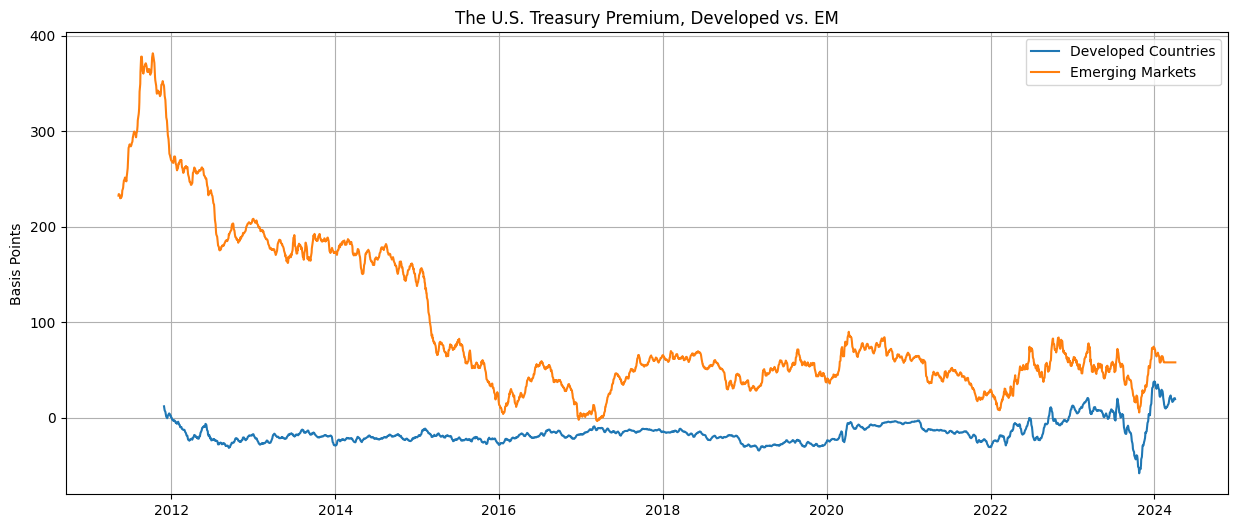

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(df_usd_5y['Timestamp'], df_usd_5y['ustp_mean'], label='Developed Countries')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['emtp_mean'], label='Emerging Markets')


plt.ylabel('Basis Points')
plt.title("The U.S. Treasury Premium, Developed vs. EM")
plt.legend()
plt.grid(True)

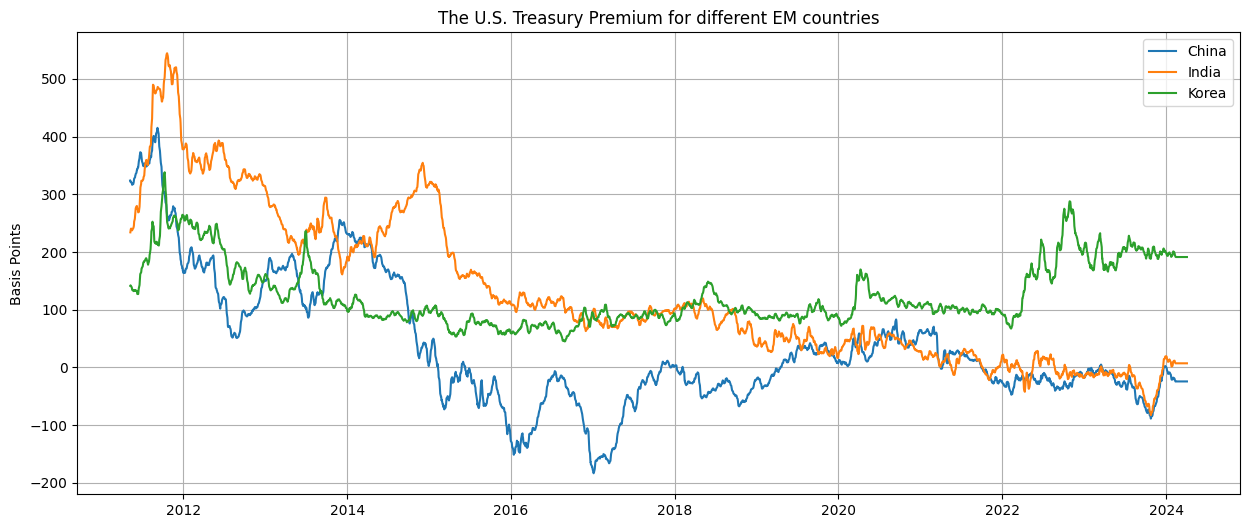

In [ ]:
plt.figure(figsize=(15, 6))


plt.plot(df_usd_5y['Timestamp'], df_usd_5y['china'], label='China')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['india'], label='India')
plt.plot(df_usd_5y['Timestamp'], df_usd_5y['korea'], label='Korea')
plt.ylabel('Basis Points')
plt.title("The U.S. Treasury Premium for different EM countries")
plt.legend()
plt.grid(True)